# Manual Pygrib

### Exemplo de Uso 

1. Importar o Pacote
2. Em seguida defina um arquivo GRIB para Leitura

In [3]:
import pygrib

filename = r'GPOSNMC20170906122017090612P.fct.TQ0666L064.grb'

In [4]:
grib = pygrib.open(filename)
for g in grib:
    print(g)

1:Topography:m (instant):regular_ll:surface:level 0:fcst time 0 6 hr periods:from 201709061200
2:Land sea mask:(0 - 1) (instant):regular_ll:surface:level 0:fcst time 0 6 hr periods:from 201709061200
3:Surface pressure:hPa (instant):regular_ll:surface:level 0:fcst time 0 6 hr periods:from 201709061200
4:Surface zonal wind (u):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 6 hr periods:from 201709061200
5:Zonal wind (u):m s**-1 (instant):regular_ll:isobaricInhPa:level 1020:fcst time 0 6 hr periods:from 201709061200
6:Zonal wind (u):m s**-1 (instant):regular_ll:isobaricInhPa:level 1000:fcst time 0 6 hr periods:from 201709061200
7:Zonal wind (u):m s**-1 (instant):regular_ll:isobaricInhPa:level 975:fcst time 0 6 hr periods:from 201709061200
8:Zonal wind (u):m s**-1 (instant):regular_ll:isobaricInhPa:level 950:fcst time 0 6 hr periods:from 201709061200
9:Zonal wind (u):m s**-1 (instant):regular_ll:isobaricInhPa:level 925:fcst time 0 6 hr periods:from 201709061200
10:Zonal wind (u):

Para validar as mensagens, é possível comparar as mensagens acima com o arquivo *ctl* do arquivo grib. Os arquivos ctl são arquivos que contém os metadados referentes ao GRIB, portanto eles contém as informações corretas e não há possibilidade de erros.

### Arquivo ctl

<img src="Seleção_013.png">

### Selecionando uma mensagem

É possível selecionar uma única mensagem para que ela seja analisada detalhadamente. Selecione a mensagem utilizando o número da mensagem diretamente ou através do nome.

In [5]:
# selecionar diretamente pelo número
surface_pressure = grib[3]
surface_pressure

3:Surface pressure:hPa (instant):regular_ll:surface:level 0:fcst time 0 6 hr periods:from 201709061200

In [7]:
# selecionar a mensagem pelo nome
surface_pressure = grib.select(name='Surface pressure')[0]
surface_pressure

3:Surface pressure:hPa (instant):regular_ll:surface:level 0:fcst time 0 6 hr periods:from 201709061200

Cada mensagem grib possui muitas palavras chaves que podem ser acessadas e darão maiores informações sobre a mensagem. É possível ter uma lista de todas as palavras utilizando a função *msg.keys()*

In [9]:
surface_pressure.keys()

[u'parametersVersion',
 u'UseEcmfConventions',
 u'GRIBEX_boustrophedonic',
 u'hundred',
 u'globalDomain',
 u'GRIBEditionNumber',
 u'eps',
 u'offsetSection0',
 u'section0Length',
 u'totalLength',
 u'editionNumber',
 u'WMO',
 u'productionStatusOfProcessedData',
 u'section1Length',
 u'wrongPadding',
 u'table2Version',
 u'centre',
 u'centreDescription',
 u'generatingProcessIdentifier',
 u'gridDefinition',
 u'indicatorOfParameter',
 u'parameterName',
 u'parameterUnits',
 u'indicatorOfTypeOfLevel',
 u'pressureUnits',
 u'typeOfLevelECMF',
 u'typeOfLevel',
 u'level',
 u'yearOfCentury',
 u'month',
 u'day',
 u'hour',
 u'minute',
 u'second',
 u'unitOfTimeRange',
 u'P1',
 u'P2',
 u'timeRangeIndicator',
 u'numberIncludedInAverage',
 u'numberMissingFromAveragesOrAccumulations',
 u'centuryOfReferenceTimeOfData',
 u'subCentre',
 u'paramIdECMF',
 u'paramId',
 u'cfNameECMF',
 u'cfName',
 u'cfVarNameECMF',
 u'cfVarName',
 u'unitsECMF',
 u'units',
 u'nameECMF',
 u'name',
 u'decimalScaleFactor',
 u'setLoca

### Obter coordenadas e os dados

Para se obter os valores corretos de latitude do grib1 é necessário corrigir os valores. O dado original apresenta as latitudes fora do padrão, e por isso é necessário somar um valor para que os dados sejam corrigidos.

In [31]:
# surface_pressure = grib[3]

lats, lons = surface_pressure.latlons()
values = surface_pressure.values # é o mesmo que values=surface_pressure['values]

lats = lats[::] + 179.91
lats

array([[ 89.91,  89.91,  89.91, ...,  89.91,  89.91,  89.91],
       [ 89.73,  89.73,  89.73, ...,  89.73,  89.73,  89.73],
       [ 89.55,  89.55,  89.55, ...,  89.55,  89.55,  89.55],
       ..., 
       [-89.55, -89.55, -89.55, ..., -89.55, -89.55, -89.55],
       [-89.73, -89.73, -89.73, ..., -89.73, -89.73, -89.73],
       [-89.91, -89.91, -89.91, ..., -89.91, -89.91, -89.91]])

### Visualização

Para a visualização dos dados é necessário o uso da Matplotlib e Basemap

In [19]:
%matplotlib inline

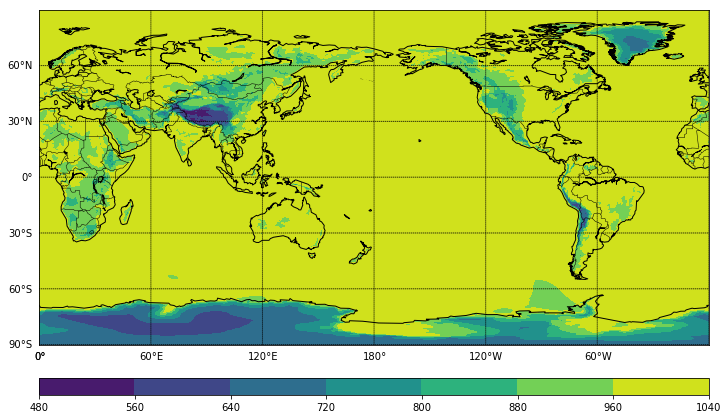

In [35]:
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
import numpy as np

fig = plt.figure(figsize=(12, 9))

m = Basemap(projection='cyl',
                llcrnrlat = -90, 
                llcrnrlon = 0,
                urcrnrlat = 90,
                urcrnrlon = 360)

m.drawcoastlines()
m.drawcountries()
m.drawcounties()

m.drawparallels(np.arange(-90., 90., 30.), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1], fontsize=10)

cs = m.contourf(lons, lats, values)
cbar = m.colorbar(cs, location='bottom', pad='10%')

plt.show()